In [81]:
#from graphviz import Digraph
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from graphviz import Digraph
import pandas as pd
from sys import maxsize 
from itertools import permutations

In [82]:
V = 4
 
#function of traveling Salesman Problem 
def travellingSalesmanProblem(graph, s): 
    # inserting all the elemenst apart from source vertex 
    vertex = [] 
    for i in range(V): 
        if i != s: 
            vertex.append(i) 
    min_path = maxsize 
    next_permutation=permutations(vertex)
    for i in next_permutation:
        current_pathweight = 0
        k = s 
        for j in i: 
            current_pathweight += graph[k][j]
            k = j 
        current_pathweight += graph[k][s] 
        # update minimum 
        min_path = min(min_path, current_pathweight) 
        plotgraph(i,s) 
    return min_path

In [83]:
def plotgraph(i,s):
    nodes_list = list(i)
    nodes_list.append(s)
    nodes_list.insert(0,s)
    nodes_list = list(map(str,nodes_list)) 
    print(nodes_list)
    # Base class for directed graphs.
    # A DiGraph stores nodes and edges with optional data, or attributes.
    G = nx.DiGraph()
    # creates a list of edge tuples
    G.add_edges_from([(nodes_list[i],nodes_list[i+1]) for i in range(0,len(nodes_list)-1)])
    # Position nodes using a force-directed algorithm (NetworkX graph is given as input)
    pos = nx.spring_layout(G,k=4)
    #This draws only the nodes of the graph G.
    nx.draw_networkx_nodes(G, pos,node_color = "yellow", node_size = 300)
    # Draw node labels on the graph G.
    nx.draw_networkx_labels(G, pos)
    # This draws only the edges of the graph G.
    nx.draw_networkx_edges(G, pos, edge_color='b', arrows=True)
    # function to show the plot
    plt.show()
    

    1   2   3   4
1   0  32  12  19
2  13   0  25  48
3  41  45   0  33
4   9  11  17   0
The smallest distance between the cities that can be covered is : 
['0', '1', '2', '3', '0']


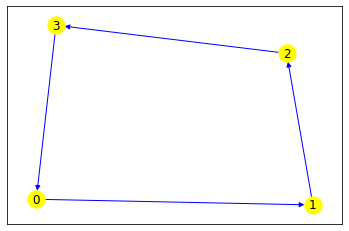

['0', '1', '3', '2', '0']


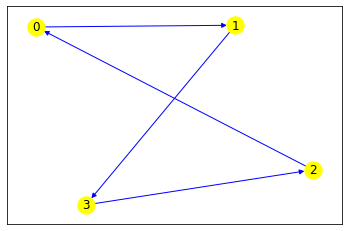

['0', '2', '1', '3', '0']


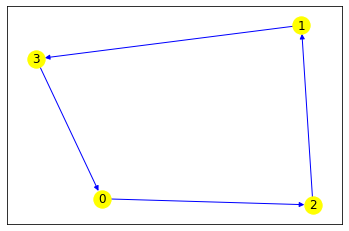

['0', '2', '3', '1', '0']


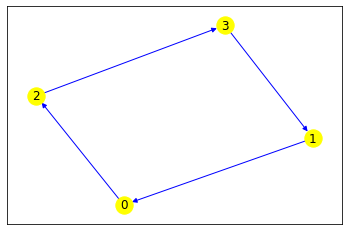

['0', '3', '1', '2', '0']


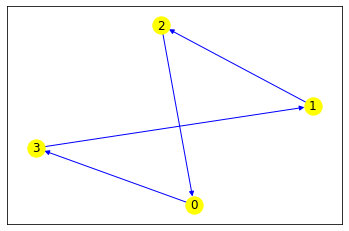

['0', '3', '2', '1', '0']


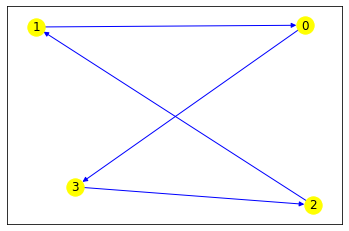

69


In [84]:
# matrix representation of graph 

#graph = [[0, 10, 15, 20], [5, 0, 9, 10], [6, 13, 0, 12], [8, 8, 9, 0]]
x = np.random.randint(50, size = (4, 4))
nodes = '1234'
headers = [_ for _ in nodes] 
np.fill_diagonal(x, 0)
s = pd.DataFrame(x, index=headers, columns=headers) 
print(s)
graph = x
s = 0
print("The smallest distance between the cities that can be covered is : ")
mindist = travellingSalesmanProblem(graph, s)
print(mindist)